<a href="https://colab.research.google.com/github/salma123456789123456789-dotcom/Pneumonia-Detection-using-Chest-X-Ray-images/blob/main/Pneumonia_Detectio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow

# Nouvelle section

# Nouvelle section

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
! pip install tqdm

# **Model VGG16**

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob

from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import load_model, Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

%matplotlib inline
tf.__version__

'2.4.0'

In [ ]:
# setup file structure

base_dir = "/content/drive/MyDrive/Kaggle/pneumonia_data/chest_xray"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")
val_dir = os.path.join(base_dir, "val/")

In [ ]:

print("Number of images in Train is {}".format(len(glob(train_dir + "*/*"))))
print("Number of images in Test is {}".format(len(glob(test_dir + "*/*"))))
print("Number of images in Validation is {}".format(len(glob(val_dir + "*/*"))))

Number of images in Train is 5216
Number of images in Test is 624
Number of images in Validation is 16


In [ ]:
IMG_SHAPE = (224, 224,3)

In [ ]:
base_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
base_model.trainable = False

In [ ]:
base_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
# useful for getting number of classes
folders = glob(train_dir+'/*')

In [ ]:
folders

['/content/drive/MyDrive/Kaggle/pneumonia_data/chest_xray/train/NORMAL',
 '/content/drive/MyDrive/Kaggle/pneumonia_data/chest_xray/train/PNEUMONIA']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(base_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
history= model.fit_generator(training_set, steps_per_epoch=10  ,epochs=5, validation_data=test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
10/10 [==============================] - 13s 1s/step - loss: 0.0521 - accuracy: 0.9688 - val_loss: 0.4446 - val_accuracy: 0.8814
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 0.1047 - accuracy: 0.9625 - val_loss: 0.3380 - val_accuracy: 0.9087
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.0586 - accuracy: 0.9719 - val_loss: 0.2793 - val_accuracy: 0.9135
Epoch 4/5
10/10 [==============================] - 13s 1s/step - loss: 0.0974 - accuracy: 0.9625 - val_loss: 0.3888 - val_accuracy: 0.8942
Epoch 5/5
10/10 [==============================] - 13s 1s/step - loss: 0.0954 - accuracy: 0.9656 - val_loss: 0.2840 - val_accuracy: 0.9135


In [ ]:
valid_loss, valid_accuracy = model.evaluate_generator(test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print("Accuracy after transfer learning: {}".format(valid_accuracy))

Accuracy after transfer learning: 0.9134615659713745


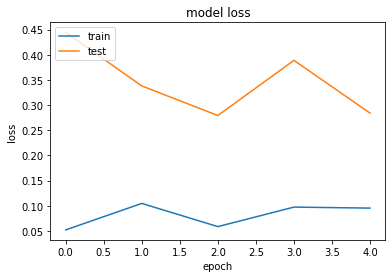

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

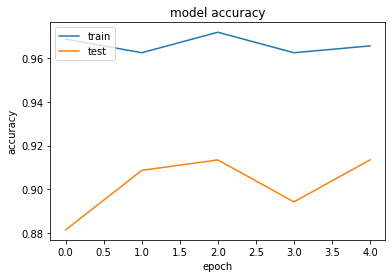

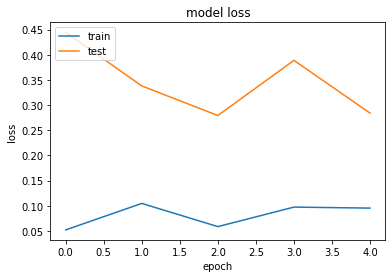

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Model VGG19**

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob

from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import load_model, Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

%matplotlib inline
tf.__version__

'2.4.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/MyDrive/Kaggle/pneumonia_data/chest_xray"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")
val_dir = os.path.join(base_dir, "val/")

In [ ]:
print("Number of images in Train is {}".format(len(glob(train_dir + "*/*"))))
print("Number of images in Test is {}".format(len(glob(test_dir + "*/*"))))
print("Number of images in Validation is {}".format(len(glob(val_dir + "*/*"))))

Number of images in Train is 5216
Number of images in Test is 624
Number of images in Validation is 16


In [ ]:
IMG_SHAPE = (224, 224,3)

In [ ]:
base_model = VGG19(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
base_model.trainable = False

In [ ]:
base_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
# useful for getting number of classes
folders = glob(train_dir+'/*')

In [ ]:
folders

['/content/drive/MyDrive/Kaggle/pneumonia_data/chest_xray/train/NORMAL',
 '/content/drive/MyDrive/Kaggle/pneumonia_data/chest_xray/train/PNEUMONIA']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(base_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
history= model.fit_generator(training_set, epochs=5, validation_data=test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 1476s 9s/step - loss: 0.4150 - accuracy: 0.8456 - val_loss: 0.2697 - val_accuracy: 0.9054
Epoch 2/5
163/163 [==============================] - 121s 742ms/step - loss: 0.1244 - accuracy: 0.9541 - val_loss: 0.3090 - val_accuracy: 0.9006
Epoch 3/5
163/163 [==============================] - 120s 736ms/step - loss: 0.1394 - accuracy: 0.9492 - val_loss: 0.6996 - val_accuracy: 0.8429
Epoch 4/5
163/163 [==============================] - 120s 736ms/step - loss: 0.1262 - accuracy: 0.9537 - val_loss: 0.3181 - val_accuracy: 0.9151
Epoch 5/5
163/163 [==============================] - 120s 736ms/step - loss: 0.1038 - accuracy: 0.9625 - val_loss: 0.2669 - val_accuracy: 0.9247


In [ ]:
valid_loss, valid_accuracy = model.evaluate_generator(test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print("Accuracy after transfer learning: {}".format(valid_accuracy))

Accuracy after transfer learning: 0.9246794581413269


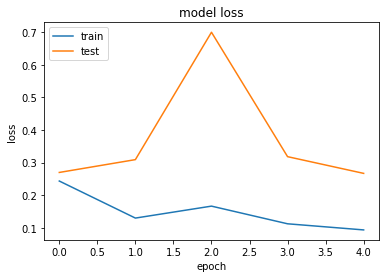

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

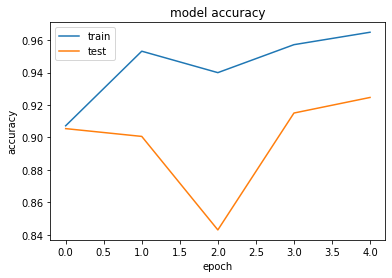

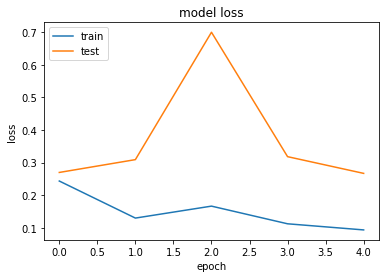

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **ResNet50**

In [ ]:
import os
import zipfile
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob

from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import load_model, Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

%matplotlib inline
tf.__version__

'2.4.0'

In [ ]:
base_dir = "/content/drive/MyDrive/Kaggel/pneumonia_data/chest_xray"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")
val_dir = os.path.join(base_dir, "val/")

In [ ]:
print("Number of images in Train is {}".format(len(glob(train_dir + "*/*"))))
print("Number of images in Test is {}".format(len(glob(test_dir + "*/*"))))
print("Number of images in Validation is {}".format(len(glob(val_dir + "*/*"))))

Number of images in Train is 5216
Number of images in Test is 624
Number of images in Validation is 16


In [ ]:
IMG_SHAPE = (224, 224,3)

In [ ]:
base_model = ResNet50(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
base_model.trainable = False

In [ ]:
base_model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [ ]:
# useful for getting number of classes
folders = glob(train_dir+'/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(base_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
history= model.fit_generator(training_set, epochs=5, validation_data=test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 111s 681ms/step - loss: 0.0535 - accuracy: 0.9814 - val_loss: 0.2810 - val_accuracy: 0.9119
Epoch 2/5
163/163 [==============================] - 111s 680ms/step - loss: 0.0672 - accuracy: 0.9762 - val_loss: 0.3663 - val_accuracy: 0.9054
Epoch 3/5
163/163 [==============================] - 109s 670ms/step - loss: 0.0703 - accuracy: 0.9753 - val_loss: 0.3702 - val_accuracy: 0.9087
Epoch 4/5
163/163 [==============================] - 111s 678ms/step - loss: 0.0634 - accuracy: 0.9768 - val_loss: 0.3374 - val_accuracy: 0.8990
Epoch 5/5
163/163 [==============================] - 109s 670ms/step - loss: 0.0700 - accuracy: 0.9732 - val_loss: 0.6489 - val_accuracy: 0.8590


In [ ]:
valid_loss, valid_accuracy = model.evaluate_generator(test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print("Accuracy after transfer learning: {}".format(valid_accuracy))

Accuracy after transfer learning: 0.8589743375778198


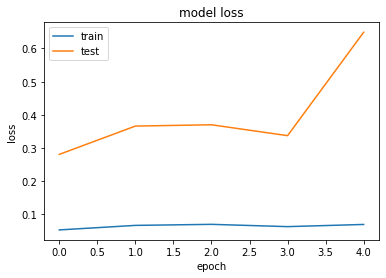

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

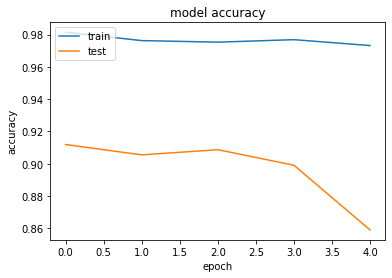

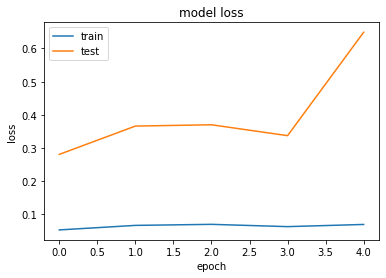

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **DenseNet201**

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob

from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import load_model, Model
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input

%matplotlib inline
tf.__version__

'2.4.0'

In [ ]:
# setup file structure

base_dir = "/content/drive/MyDrive/Kaggle/pneumonia_data/chest_xray"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")
val_dir = os.path.join(base_dir, "val/")

In [ ]:
print("Number of images in Train is {}".format(len(glob(train_dir + "*/*"))))
print("Number of images in Test is {}".format(len(glob(test_dir + "*/*"))))
print("Number of images in Validation is {}".format(len(glob(val_dir + "*/*"))))

Number of images in Train is 5216
Number of images in Test is 624
Number of images in Validation is 16


In [ ]:
IMG_SHAPE = (224, 224,3)

In [ ]:
base_model = DenseNet121(include_top=True, weights='imagenet')

In [ ]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
base_model.trainable = False

In [ ]:
base_model.output

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [ ]:
# useful for getting number of classes
folders = glob(train_dir+'/*')

In [ ]:
folders

['/content/drive/MyDrive/Kaggle/pneumonia_data/chest_xray/train/NORMAL',
 '/content/drive/MyDrive/Kaggle/pneumonia_data/chest_xray/train/PNEUMONIA']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(base_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
history= model.fit_generator(training_set, epochs=5, validation_data=test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 114s 665ms/step - loss: 0.6539 - accuracy: 0.7527 - val_loss: 0.6340 - val_accuracy: 0.6250
Epoch 2/5
163/163 [==============================] - 106s 651ms/step - loss: 0.5717 - accuracy: 0.7261 - val_loss: 0.6179 - val_accuracy: 0.6250
Epoch 3/5
163/163 [==============================] - 106s 647ms/step - loss: 0.5099 - accuracy: 0.7490 - val_loss: 0.6084 - val_accuracy: 0.6250
Epoch 4/5
163/163 [==============================] - 106s 648ms/step - loss: 0.4881 - accuracy: 0.7388 - val_loss: 0.6010 - val_accuracy: 0.6314
Epoch 5/5
163/163 [==============================] - 106s 650ms/step - loss: 0.4563 - accuracy: 0.7538 - val_loss: 0.5923 - val_accuracy: 0.6378


In [ ]:
valid_loss, valid_accuracy = model.evaluate_generator(test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print("Accuracy after transfer learning: {}".format(valid_accuracy))

Accuracy after transfer learning: 0.6378205418586731


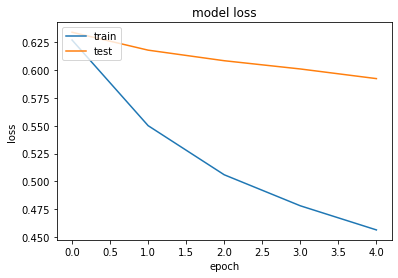

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

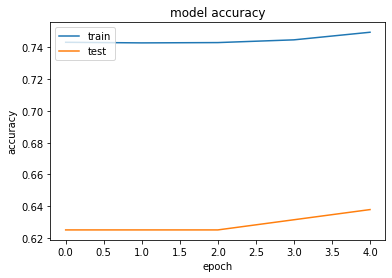

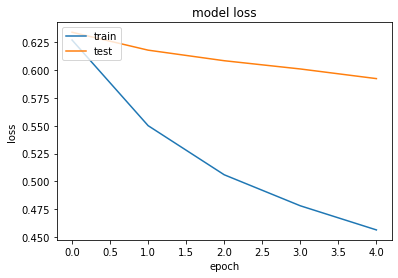

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Neural Network Architectures from Scratch**



**Model 1 : Architecture without using Batch Normalization and Dropout**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

In [ ]:
# Initialising the CNN
classifier = Sequential()

In [ ]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [ ]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Step 3 - Flattening
classifier.add(Flatten())

In [ ]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set, epochs=5, validation_data=test_set)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 62s 379ms/step - loss: 0.4822 - accuracy: 0.7709 - val_loss: 0.3493 - val_accuracy: 0.8365
Epoch 2/5
163/163 [==============================] - 63s 386ms/step - loss: 0.2389 - accuracy: 0.9004 - val_loss: 0.3695 - val_accuracy: 0.8510
Epoch 3/5
163/163 [==============================] - 62s 381ms/step - loss: 0.2188 - accuracy: 0.9098 - val_loss: 0.3252 - val_accuracy: 0.8654
Epoch 4/5
163/163 [==============================] - 62s 378ms/step - loss: 0.1945 - accuracy: 0.9269 - val_loss: 0.4418 - val_accuracy: 0.8285
Epoch 5/5
163/163 [==============================] - 62s 379ms/step - loss: 0.1794 - accuracy: 0.9307 - val_loss: 0.3408 - val_accuracy: 0.8734


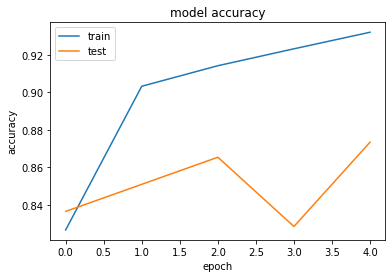

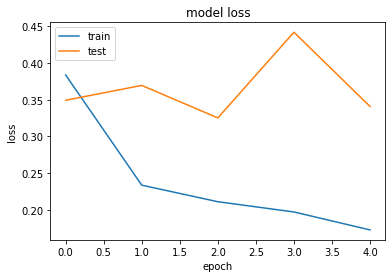

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 2: Achitecture using Batch Normalization and Dropout**

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import warnings
warnings.filterwarnings("ignore")

output_dim=10
batch_size = 128 
nb_epoch = 50
input_shape = (64, 64, 3)
#Initialize model
model = Sequential()

#CNN Layer 1
#input: 28X28 images with 1 channel -> (28X28X1) tensors.
#this applies 64 convolution filters of size 3X3 each.
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

#CNN Layer 2
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

#Using adam as our optimzer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#Get a summary of the model.
print(model.summary())

#Compile the model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 66, 66, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 64)       

In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set, epochs=5, validation_data=test_set)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 62s 382ms/step - loss: 0.1551 - accuracy: 0.9394 - val_loss: 0.2752 - val_accuracy: 0.9071
Epoch 2/5
163/163 [==============================] - 61s 372ms/step - loss: 0.1600 - accuracy: 0.9379 - val_loss: 0.3141 - val_accuracy: 0.8958
Epoch 3/5
163/163 [==============================] - 60s 371ms/step - loss: 0.1534 - accuracy: 0.9410 - val_loss: 0.2760 - val_accuracy: 0.9006
Epoch 4/5
163/163 [==============================] - 60s 370ms/step - loss: 0.1410 - accuracy: 0.9459 - val_loss: 0.3881 - val_accuracy: 0.8702
Epoch 5/5
163/163 [==============================] - 61s 372ms/step - loss: 0.1459 - accuracy: 0.9454 - val_loss: 0.2504 - val_accuracy: 0.9087


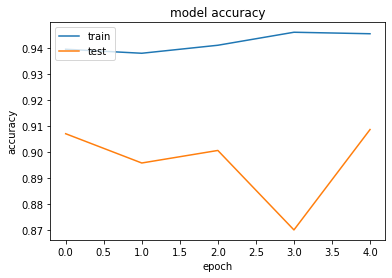

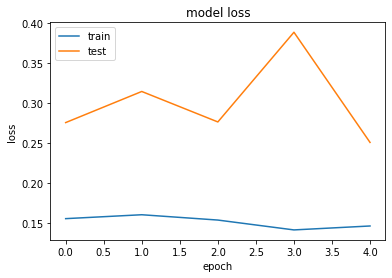

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 3: Convolutional layer**

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
model_3_hidden= Sequential()

# Step 1 - Convolution
model_3_hidden.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Adding a second convolutional layer
model_3_hidden.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Adding a third convolutional layer
model_3_hidden.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Step 3 - Flattening
model_3_hidden.add(Flatten())

# Step 4 - Full connection
model_3_hidden.add(Dense(units = 128, activation = 'relu'))
model_3_hidden.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model_3_hidden.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model_3_hidden.summary()
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=model_3_hidden.fit_generator(training_set, epochs=5, validation_data=test_set)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 32)       

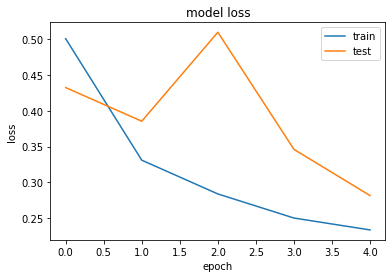

In [ ]:

# plotting training set and validation test 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='left')
plt.show()

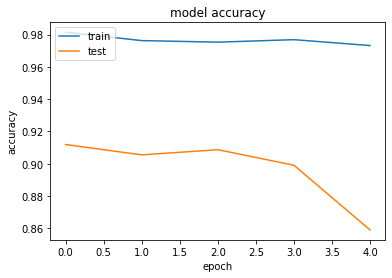

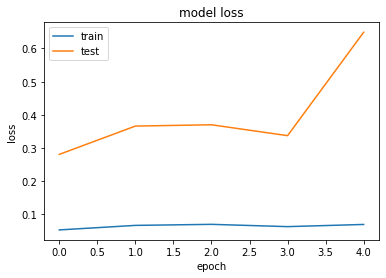

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()







# **ML : Support Vector Machine SVM**

In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
import warnings

from random import shuffle 
from tqdm import tqdm 
from PIL import Image
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

%matplotlib inline

in_path = '/content/drive/MyDrive/Kaggle/pneumonia_data/chest_xray/'

In [ ]:
def extract_data(dimensions, batch_length):
    tgen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)
    test_val_datagen = ImageDataGenerator(rescale=1./255)
    tgen_final = tgen.flow_from_directory(directory=in_path+'train', target_size=(dimensions, dimensions), batch_size=batch_length, class_mode='binary', shuffle=True)
    test_gen = test_val_datagen.flow_from_directory(directory=in_path+'test', target_size=(dimensions, dimensions), batch_size=batch_length, class_mode='binary', shuffle=True)

    test_data = []
    test_labels = []
    
    train_data = []
    train_labels = []

    for normal_image in (os.listdir(in_path + 'test' + '/NORMAL/')):
        normal_image = plt.imread(in_path+'test'+'/NORMAL/'+normal_image)
        normal_image = cv2.resize(normal_image, (dimensions, dimensions))
        normal_image = normal_image.astype('float32') / 255
        label = 0
        test_data.append(normal_image)
        test_labels.append(label)

    for pneumonia_image in (os.listdir(in_path + 'test' + '/PNEUMONIA/')):
        pneumonia_image = plt.imread(in_path+'test'+'/PNEUMONIA/'+pneumonia_image)
        pneumonia_image = cv2.resize(pneumonia_image, (dimensions, dimensions))
        pneumonia_image = pneumonia_image.astype('float32') / 255
        label = 1
        test_data.append(pneumonia_image)
        test_labels.append(label)

    for normal_image in (os.listdir(in_path + 'train' + '/NORMAL/')):
        if normal_image == '.DS_Store':
            continue
        normal_image = plt.imread(in_path+'train'+'/NORMAL/'+normal_image)
        normal_image = cv2.resize(normal_image, (dimensions, dimensions))
        normal_image = normal_image.astype('float32') / 255
        label = 0
        train_data.append(normal_image)
        train_labels.append(label)

    for pneumonia_image in (os.listdir(in_path + 'train' + '/PNEUMONIA/')):
        if pneumonia_image == '.DS_Store':
            continue
        pneumonia_image = plt.imread(in_path+'train'+'/PNEUMONIA/'+pneumonia_image)
        pneumonia_image = cv2.resize(pneumonia_image, (dimensions, dimensions))
        pneumonia_image = pneumonia_image.astype('float32') / 255
        label = 1
        train_data.append(pneumonia_image)
        train_labels.append(label)
    
    return tgen_final, test_gen, test_data, test_labels, train_data, train_labels

In [ ]:
img_dims = 150
epochs = 3
batch_size = 10

train_gen, test_gen, test_data, test_labels, train_data, train_labels = extract_data(img_dims, batch_size)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
flat_train_data = []
flat_test_data = []

for img in train_data: 
    flat_train_data.append(img.flatten())
    
for img in test_data: 
    flat_test_data.append(img.flatten())

In [ ]:
listed_train_data = []
listed_test_data = []

for d in flat_train_data:
    listed_train_data.append(d.tolist()[:150*150])
    
for d in flat_test_data:
    listed_test_data.append(d.tolist()[:150*150])

In [ ]:
train_labels_mini = train_labels
test_labels_mini = test_labels


In [ ]:
clf = svm.SVC()
prediction = clf.fit(listed_train_data, train_labels_mini)

In [ ]:
correctlyPredicted = 0
fp = 0
tp = 0
fn = 0
tn = 0

for ind in range(len(listed_test_data)): 
    pred = clf.predict([listed_test_data[ind]])
    real = test_labels_mini[ind]
    if real == 1 and pred == 1:
        tp += 1
    if real == 1 and pred == 0:
        fn += 1
    if real == 0 and pred == 1:
        fp += 1
    if real == 0 and pred == 0:
        tn += 1
    if pred == real:
        correctlyPredicted += 1

acc = correctlyPredicted/float(len(listed_test_data))
print("TEST DATA________________________")
print("Accuracy: {}".format(acc))
print("Confusion matrix: f_p = {}, t_p = {}, f_n = {}, t_n = {}".format(fp, tp, fn, tn))

prec = tp/(tp+fp)*100
rec = tp/(tp+fn)*100
print("Precision: {}, recall: {}".format(prec, rec))

TEST DATA________________________
Accuracy: 0.7612179487179487
Confusion matrix: f_p = 144, t_p = 385, f_n = 5, t_n = 90
Precision: 72.77882797731569, recall: 98.71794871794873


In [ ]:
correctlyPredicted = 0
fp = 0
tp = 0
fn = 0
tn = 0

for ind in range(len(listed_train_data)): 
    pred = clf.predict([listed_train_data[ind]])
    real = train_labels_mini[ind]
    if real == 1 and pred == 1:
        tp += 1
    if real == 1 and pred == 0:
        fn += 1
    if real == 0 and pred == 1:
        fp += 1
    if real == 0 and pred == 0:
        tn += 1
    if pred == real:
        correctlyPredicted += 1

acc = correctlyPredicted/float(len(listed_train_data))
print("TRAIN DATA________________________")
print("Accuracy: {}".format(acc))
print("Confusion matrix: f_p = {}, t_p = {}, f_n = {}, t_n = {}".format(fp, tp, fn, tn))

prec = tp/(tp+fp)*100
rec = tp/(tp+fn)*100
print("Precision: {}, recall: {}".format(prec, rec))

TRAIN DATA________________________
Accuracy: 0.9831288343558282
Confusion matrix: f_p = 48, t_p = 3835, f_n = 40, t_n = 1293
Precision: 98.76384238990471, recall: 98.96774193548387
